# Spectrogram Code


**Example from scipy using Short Time Fourier Transform STFT**

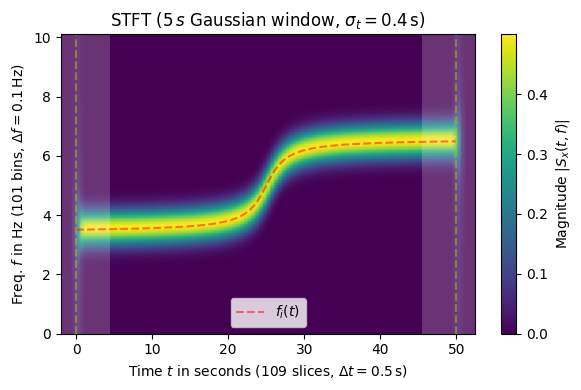

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian, boxcar

T_x, N = 1 / 20, 1000  # 20 Hz sampling rate for 50 s signal
t_x = np.arange(N) * T_x  # time indexes for signal

f_i = 1 * np.arctan((t_x - t_x[N // 2]) / 2) + 5  # generating frequencies
x = np.sin(2*np.pi*np.cumsum(f_i)*T_x) # the signal

g_std = 8  # standard deviation for Gaussian window in samples
w = gaussian(100, std=g_std, sym=True)  # symmetric Gaussian window

SFT = ShortTimeFFT(w, hop=10, fs=1/T_x, mfft=200, scale_to='magnitude')
Sx = SFT.stft(x)  # perform the STFT

fig1, ax1 = plt.subplots(figsize=(6., 4.))  # enlarge plot a bit
t_lo, t_hi = SFT.extent(N)[:2]  # time range of plot

ax1.set_title(rf"STFT ({SFT.m_num*SFT.T:g}$\,s$ Gaussian window, " +
              rf"$\sigma_t={g_std*SFT.T}\,$s)")
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",
        xlim=(t_lo, t_hi))
im1 = ax1.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='viridis')
ax1.plot(t_x, f_i, 'r--', alpha=.5, label='$f_i(t)$')
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|$")

# Shade areas where window slices stick out to the side:
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.2)
for t_ in [0, N * SFT.T]:  # mark signal borders with vertical line:
    ax1.axvline(t_, color='y', linestyle='--', alpha=0.5)
ax1.legend()
fig1.tight_layout()
plt.show()

A more simple example

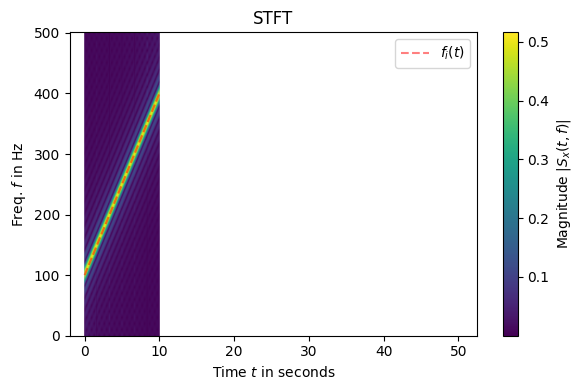

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian, boxcar
from scipy.signal import chirp

# Sampling setup
T_x = 1 / 1000        # 0.001 s sampling period (1 kHz sample rate)
f_s = 1 / T_x         # Sampling rate = 1000 Hz
N = 10000             # 10000 samples = 10 seconds
t_x = np.arange(N) * T_x

# Linear chirp parameters
f_start = 100         # Start frequency (Hz)
f_end = 400          # End frequency (Hz)

# Generate chirp signal
x = chirp(t_x, f0=f_start, f1=f_end, t1=10, method='linear')

# Expected instantaneous frequency for overlay
f_i = f_start + (f_end - f_start) * (t_x / 10)

# Window and STFT parameters
w = boxcar(50)  # 50-sample rectangular window
SFT = ShortTimeFFT(w, hop=10, fs = f_s, mfft=1000, scale_to='magnitude')
Sx = SFT.stft(x)

# Plot STFT magnitude
fig1, ax1 = plt.subplots(figsize=(6., 4.))
ax1.set_title("STFT")
ax1.set(
    xlabel=f"Time $t$ in seconds",
    ylabel=f"Freq. $f$ in Hz",
    xlim=(t_lo, t_hi))

im1 = ax1.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='viridis')
ax1.plot(t_x, f_i, 'r--', alpha=.5, label='$f_i(t)$')
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|$")

# Shade areas where window slices stick out to the side:
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.2)

ax1.legend()
fig1.tight_layout()
plt.show()

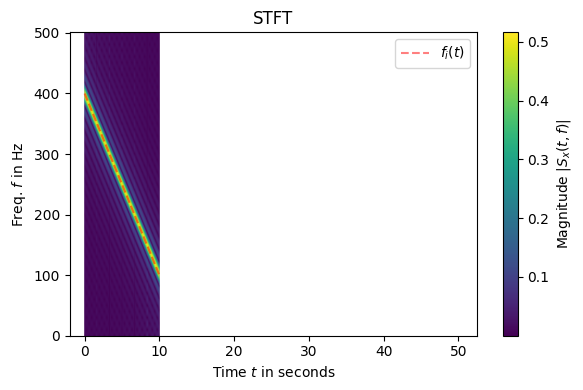

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian, boxcar
from scipy.signal import chirp

# Sampling setup
T_x = 1 / 1000        # 0.001 s sampling period (1 kHz sample rate)
f_s = 1 / T_x         # Sampling rate = 1000 Hz
N = 10000             # 10000 samples = 10 seconds
t_x = np.arange(N) * T_x

# Linear chirp parameters
f_start = 400         # Start frequency (Hz)
f_end = 100          # End frequency (Hz)

# Generate chirp signal
x = chirp(t_x, f0=f_start, f1=f_end, t1=10, method='linear')

# Expected instantaneous frequency for overlay
f_i = f_start + (f_end - f_start) * (t_x / 10)

# Window and STFT parameters
w = boxcar(50)  # 50-sample rectangular window
SFT = ShortTimeFFT(w, hop=10, fs = f_s, mfft=1000, scale_to='magnitude')
Sx = SFT.stft(x)

# Plot STFT magnitude
fig1, ax1 = plt.subplots(figsize=(6., 4.))
ax1.set_title("STFT")
ax1.set(
    xlabel=f"Time $t$ in seconds",
    ylabel=f"Freq. $f$ in Hz",
    xlim=(t_lo, t_hi))

im1 = ax1.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='viridis')
ax1.plot(t_x, f_i, 'r--', alpha=.5, label='$f_i(t)$')
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|$")

# Shade areas where window slices stick out to the side:
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.2)

ax1.legend()
fig1.tight_layout()
plt.show()

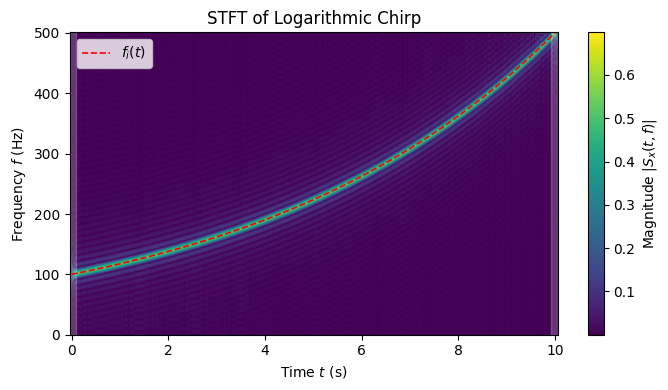

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT, chirp
from scipy.signal.windows import boxcar

# Sampling setup
T_x = 1 / 1000        # 1 kHz sampling rate
f_s = 1 / T_x
N = 10000             # 10 seconds total duration
t_x = np.arange(N) * T_x

# Chirp parameters
f_start = 100
f_end = 500
duration = 10
method = 'logarithmic'     # change to 'logarithmic' or 'hyperbolic'

# Generate chirp signal
x = chirp(t_x, f0=f_start, f1=f_end, t1=duration, method=method)

# Estimate instantaneous frequency analytically (for plotting)
if method == 'quadratic':
    # f(t) = f0 + (f1 - f0)*(t/T)^2
    f_i = f_start + (f_end - f_start)*(t_x/duration)**2
elif method == 'logarithmic':
    # f(t) = f0 * (f1/f0)^(t/T)
    f_i = f_start * (f_end/f_start)**(t_x/duration)
elif method == 'hyperbolic':
    # f(t) = (f0*f1*T)/((f1-f0)*t + f0*T)
    f_i = (f_start * f_end * duration) / ((f_end - f_start)*t_x + f_start*duration)
else:
    # fallback to linear
    f_i = f_start + (f_end - f_start)*t_x/duration

# STFT parameters
w = boxcar(100)
SFT = ShortTimeFFT(w, hop=20, fs=f_s, mfft=1000, scale_to='magnitude')
Sx = SFT.stft(x)
t_lo, t_hi = SFT.extent(N)[:2]

# Plot STFT magnitude
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title(f"STFT of {method.capitalize()} Chirp")
ax.set_xlabel("Time $t$ (s)")
ax.set_ylabel("Frequency $f$ (Hz)")
ax.set_xlim(t_lo, t_hi)

im = ax.imshow(abs(Sx), origin='lower', aspect='auto',
               extent=SFT.extent(N), cmap='viridis')
ax.plot(t_x, f_i, 'r--', lw=1.2, label='$f_i(t)$')
fig.colorbar(im, ax=ax, label="Magnitude $|S_x(t, f)|$")

# Shade borders
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0]*SFT.T),
                 (SFT.upper_border_begin(N)[0]*SFT.T, t_hi)]:
    ax.axvspan(t0_, t1_, color='w', alpha=.2)

ax.legend()
fig.tight_layout()
plt.show()


Code to open a .mat file


In [ ]:
#upload file locally
from google.colab import files
uploaded = files.upload()


Saving data_500.mat to data_500.mat


Loaded variable 'csi_total' with shape (19328, 90) and dtype complex128
(19328,)
(19328,)


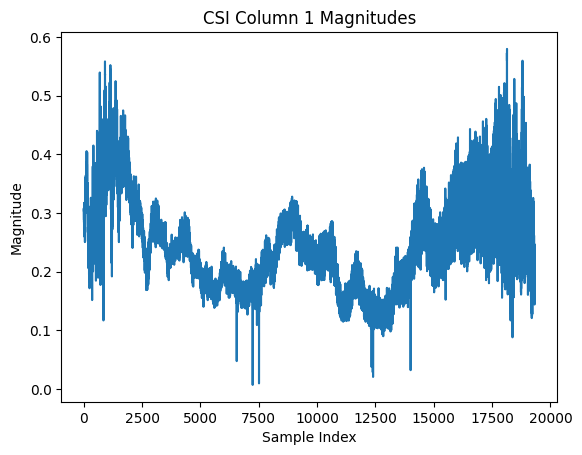

Column 1 0        0.304106
1        0.308354
2        0.291246
3        0.295034
4        0.308309
           ...   
19323    0.151310
19324    0.146220
19325    0.227790
19326    0.160312
19327    0.159935
Name: 0, Length: 19328, dtype: float64


In [ ]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Load the .mat file ----
#path = r"/content/drive/MyDrive/data_500.mat"  # your file path
#path = r"/content/drive/MyDrive/Wifi Sample Data/data_500.mat"
path = r"/content/data_500.mat"
data = sio.loadmat(path)

# ---- Automatically find the main variable ----
keys = [k for k in data.keys() if not k.startswith("__")]
if not keys:
    raise ValueError("No data variables found in the .mat file.")
var_name = keys[0]
X = data[var_name]

print(f"Loaded variable '{var_name}' with shape {X.shape} and dtype {X.dtype}")

# ---- Convert to a nice table ----
# Round to 4 decimals for readability
if np.iscomplexobj(X):
    df = pd.DataFrame(np.round(X.real, 4)) + 1j * pd.DataFrame(np.round(X.imag, 4))
else:
    df = pd.DataFrame(np.round(X, 4))

# Show first few rows and columns (like MATLAB)
#print("\nPreview of data:")
#print(df.iloc[:10, :8])  # first 10 rows × 8 columns

CSI_col1 = df[0]

CSI_col1_magnitudes = abs(CSI_col1)

x = np.arange(1, len(CSI_col1_magnitudes) + 1)
print(x.shape)
print(CSI_col1_magnitudes.shape)

plt.plot(x, CSI_col1_magnitudes)
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.title("CSI Column 1 Magnitudes")
plt.show()


plt.show()
print("Column 1", CSI_col1_magnitudes)


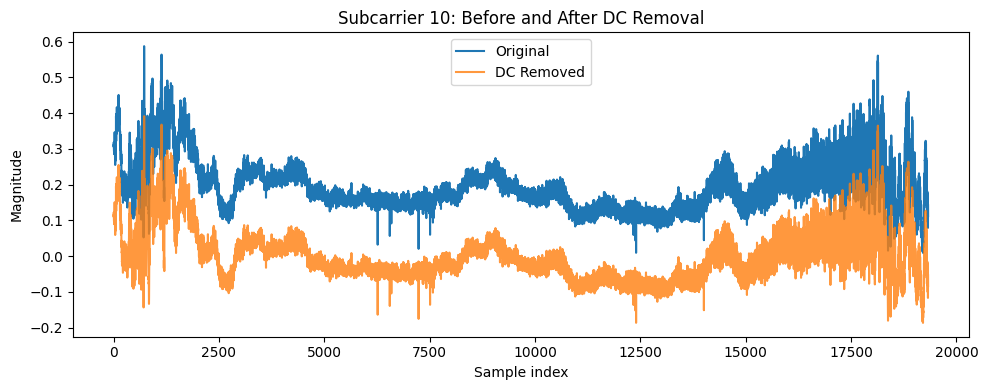

In [ ]:
#DC filter signal plot

import numpy as np
import matplotlib.pyplot as plt

col = 10
subcarrier = np.abs(X[:, col])

mean_val = np.mean(subcarrier)
filtered = subcarrier - mean_val

plt.figure(figsize=(10, 4))
plt.plot(subcarrier, label='Original')
plt.plot(filtered, label='DC Removed', alpha=0.8)
plt.title(f'Subcarrier {col}: Before and After DC Removal')
plt.xlabel('Sample index')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
plt.show()


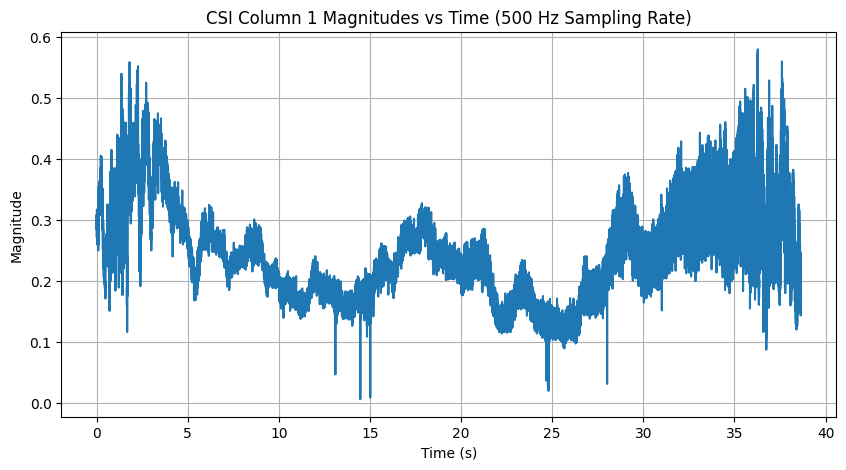

Column 1 Magnitudes: 0        0.304106
1        0.308354
2        0.291246
3        0.295034
4        0.308309
           ...   
19323    0.151310
19324    0.146220
19325    0.227790
19326    0.160312
19327    0.159935
Name: 0, Length: 19328, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract column and compute magnitudes
CSI_col1 = df[0]
CSI_col1_magnitudes = abs(CSI_col1)

# Sampling setup
fs = 500                 # Sample rate (Hz)
Ts = 1 / fs              # Sampling period (seconds)
N = len(CSI_col1_magnitudes)

# Create time axis
t = np.arange(N) * Ts    # Time vector in seconds

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, CSI_col1_magnitudes)
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
plt.title("CSI Column 1 Magnitudes vs Time (500 Hz Sampling Rate)")
plt.grid(True)
plt.show()

print("Column 1 Magnitudes:", CSI_col1_magnitudes)


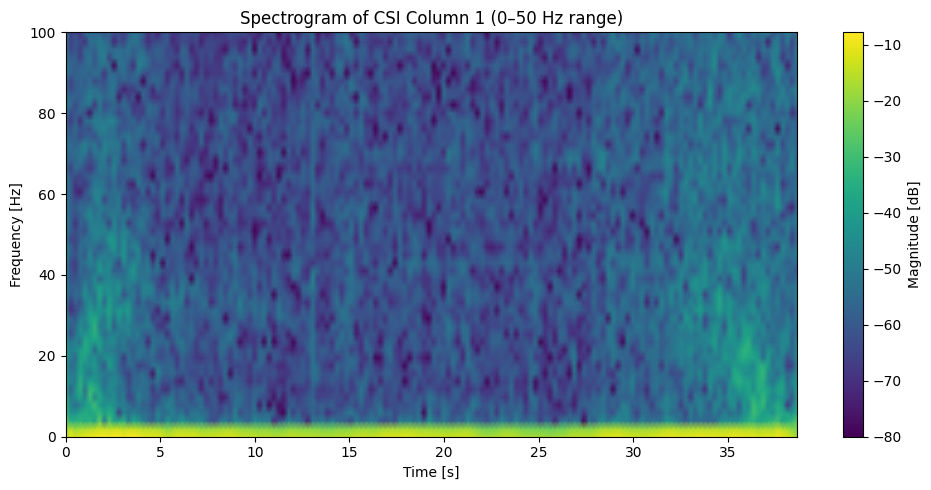

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Extract column and compute magnitudes
CSI_col1 = df[0]
CSI_col1_magnitudes = abs(CSI_col1)

# Sampling setup
fs = 500  # Hz
Ts = 1 / fs
N = len(CSI_col1_magnitudes)

# Compute STFT
f, t_stft, Zxx = stft(
    CSI_col1_magnitudes,
    fs=fs,
    window='hann',
    nperseg=256,
    noverlap=128
)

# Convert magnitude to decibels
Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-10)
Zxx_dB = np.clip(Zxx_dB, -80, 0)  # enhance visibility

# Plot spectrogram (0–50 Hz)
plt.figure(figsize=(10, 5))
plt.pcolormesh(t_stft, f, Zxx_dB, shading='gouraud', cmap='viridis')
plt.title("Spectrogram of CSI Column 1 (0–50 Hz range)")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label='Magnitude [dB]')
plt.ylim(0, 100)   # focus on low-frequency band
plt.tight_layout()
plt.show()


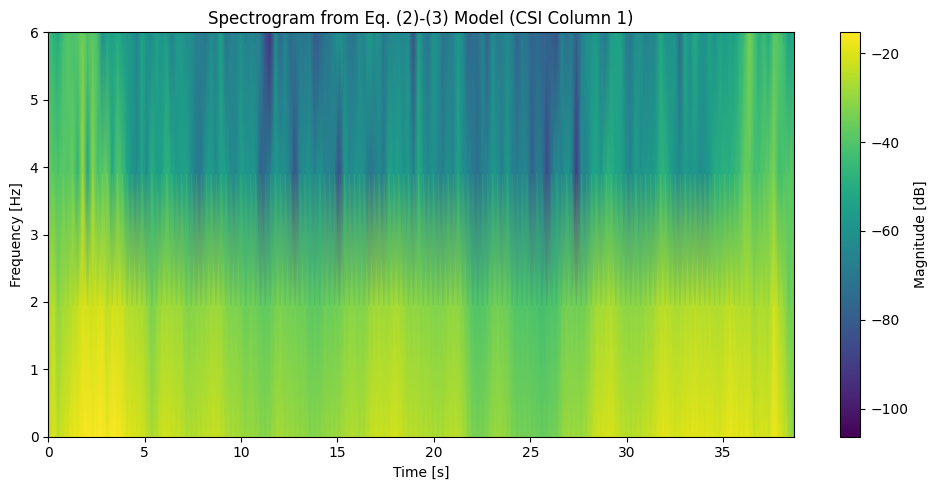

In [ ]:

# CSI_col1: complex CSI from one subcarrier
s_b = df[0].to_numpy()          # complex baseband CSI
s_t = np.abs(s_b)**2            # Eq. (3): |sb(t)|^2 → power over time

fs = 500  # Hz, adjust to your packet rate

# Short-Time Fourier Transform (Eq. 4)
f, t, Zxx = stft(s_t, fs=fs, window='hann', nperseg=256, noverlap=128)
Sxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-10)

plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx_dB, shading='gouraud', cmap='viridis')
plt.title("Spectrogram from Eq. (2)-(3) Model (CSI Column 1)")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Magnitude [dB]")
plt.ylim(0,6)
plt.tight_layout()
plt.show()

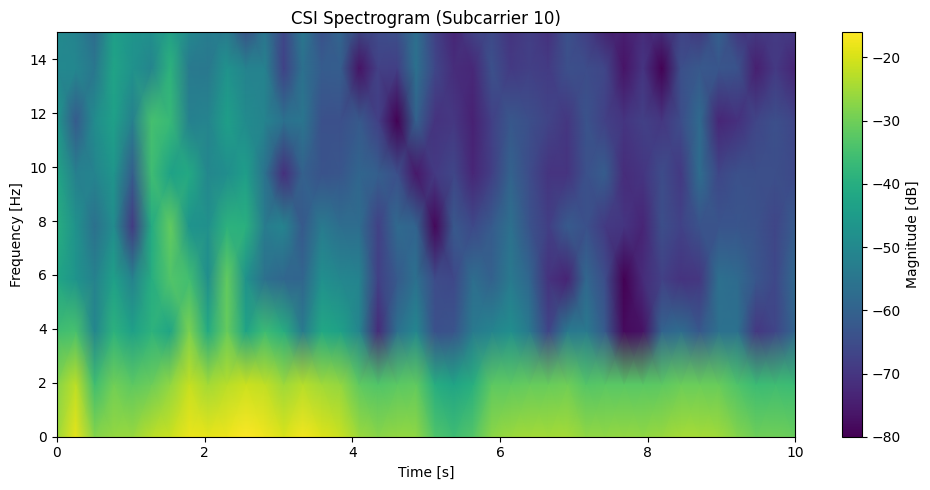

In [ ]:


# --- Load the signal (replace this with your chosen subcarrier) ---
s_b = data['csi_total'][:, 10]   # complex CSI signal, column 10
s_t = np.abs(s_b)**2             # Eq. (3): observable power signal

# --- Sampling setup ---
fs = 500  # Hz (adjust if you know your actual packet rate)
nperseg = 256
noverlap = 128

# --- Short-Time Fourier Transform (STFT) ---
f, t_stft, Zxx = stft(s_t, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap)
Sxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-10)  # convert to dB scale
Sxx_dB = np.clip(Sxx_dB, -80, 10)             # limit range for better visibility

# --- Plot: Frequency vs Time Spectrogram ---
plt.figure(figsize=(10, 5))
plt.pcolormesh(t_stft, f, Sxx_dB, shading='gouraud', cmap='viridis')

plt.title("CSI Spectrogram (Subcarrier 10)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Magnitude [dB]")

# Set desired axes limits
plt.xlim(0, 10)
plt.ylim(0, 15)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.signal import stft, find_peaks

# --- Load variable ---
s_b = data['csi_total'][:, 10]    # complex CSI for one subcarrier
s_t = np.abs(s_b)**2              # Eq. (3): observable power
print(f"s_b shape: {s_b.shape}, s_t shape: {s_t.shape}")

fs = 500  # sampling frequency (Hz) — adjust if you know the real packet rate
f, t_stft, Zxx = stft(s_t, fs=fs, window='hann', nperseg=256, noverlap=128)
Sxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-10)

plt.figure(figsize=(10,5))
plt.pcolormesh(t_stft, f, Sxx_dB, shading='gouraud', cmap='viridis')
plt.title("Spectrogram of CSI Column 10")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Magnitude [dB]")
plt.ylim(0, 2.5)
plt.tight_layout()
plt.show()

In [ ]:
c = 3e8          # speed of light (m/s)
fc = 5.18e9      # carrier frequency (Hz)
lam = c / fc     # wavelength (~0.058 m for 5.18 GHz)
psi = 1.0        # geometry factor (cosφ_R + cosφ_T); set properly if known

# Find max-energy frequency per time slice
ridge_freq_idx = np.argmax(np.abs(Zxx), axis=0)
ridge_freqs = f[ridge_freq_idx]

# Convert to instantaneous speeds (Eq. v = f * λ / ψ)
v_m = ridge_freqs * lam / psi

plt.figure(figsize=(10,4))
plt.plot(t_stft, v_m, 'r-', linewidth=2)
plt.title("Extracted Instantaneous Speed v_m(t)")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid(True)
plt.show()


In [ ]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, get_window

# ---- Load the .mat file ----
#path = r"/content/drive/MyDrive/data_500.mat"  # your file path
#path = r"/content/drive/MyDrive/Wifi Sample Data/data_500.mat"
path = r"/content/data_500.mat"
data = sio.loadmat(path)

# ---- Automatically find the main variable ----
keys = [k for k in data.keys() if not k.startswith("__")]
if not keys:
    raise ValueError("No data variables found in the .mat file.")
var_name = keys[0]
X = data[var_name]

print(f"Loaded variable '{var_name}' with shape {X.shape} and dtype {X.dtype}")

# ---- Convert to a nice table ----
# Round to 4 decimals for readability
if np.iscomplexobj(X):
    df = pd.DataFrame(np.round(X.real, 4)) + 1j * pd.DataFrame(np.round(X.imag, 4))
else:
    df = pd.DataFrame(np.round(X, 4))



fs = 500  # freq in Hz
#h = X[:, 0]
# Remove α_s e^{jθ_s} before taking power
#h0 = h - np.mean(h)               # complex mean removal
#s  = np.abs(h0)**2                # s(t) = |h'|^2  ~ Eq. (3) without P
s_b = np.abs(X[:, 0]) # pick first subcarrier (column)
s_b = s_b - np.mean(s_b) # remove coplex static path
s = np.abs(s_b) ** 2 # magnitude squared
s = s / (np.max(np.abs(s)) + 1e-12)  # ensures between -1 and 1
win_len_sec = 0.4                 # 0.4 s window
slide_sec     = 0.02                 # 0.05 s overlap
samp_per_seg     = int(round(win_len_sec*fs))   # samples per window
overlap    = samp_per_seg - int(round(slide_sec*fs))
# number of frequency bins per FFT, if not more than number of samples -> next pow2
nfft        = 1 << int(np.ceil(np.log2(max(256, samp_per_seg))))

# Use a Hann window (function to soften ends of signal)
window = get_window('hann', samp_per_seg, fftbins=True)

# Compute STFT ie. per-window FFTs
f, t, Zxx = stft(
    s, fs=fs,
    window=window,
    nperseg=samp_per_seg,
    noverlap=overlap,
    nfft=nfft,
    boundary=None,      # no padding at ends
    padded=False
)

# Convert complex STFT to how strong frequency for each time (t), then dB to plot
Sxx = np.abs(Zxx)**2
# normalize the spectrogram to [0,1]
#Sxx /= np.max(Sxx) + 1e-12
Sxx_dB = 10 * np.log10(np.abs(Zxx))

p99 = np.percentile(Sxx, 99.5)        # clip top 0.5% to stabilize colors
Slin = np.clip(Sxx / (p99 + 1e-12), 0.0, 1.0)

# velocity axis (v = f * λ / ψ)
c  = 3e8
fc = 5.18e9 # carrier frequency not given but a standard one
lam = c / fc
psi = 2.0 #random
v = f * lam / psi

plt.figure(figsize=(10,4))
plt.pcolormesh(t, v, Slin, shading='gouraud')
plt.ylim(0, 3.0)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('STFT Spectrogram for Column 1')
plt.colorbar(label='Power ')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import scipy.io as sio
import numpy as np

mat = sio.loadmat("/content/drive/MyDrive/Wifi Sample Data/data_500.mat")
csi = mat['csi_total']


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from scipy import signal
import matplotlib.pyplot as plt

mat = sio.loadmat("/content/drive/MyDrive/Wifi Sample Data/data_500.mat")
csi = mat['csi_total']

# parameters
fs = 500.0        # sampling rate (packets/sec)
Twin = 0.4         # window length in sec
hop = 0.004        # hop in sec
nperseg = int(Twin * fs)  # num samples per window
noverlap = nperseg - int(hop * fs)  # number of overlapping samples between windows
nfft = max(256, 2**int(np.ceil(np.log2(nperseg))))  # number of points in FFT per STFT
n_pca = 15        # number of subcarriers/columns kept after PCA
K = 3             # number hermite functions per HS
N, M = csi.shape  # N = samples, M = streams

# --- Step 1: magnitude squared ---
mag_sq = np.abs(csi)**2   # shape (N_samples, N_streams)
# remove DC or average value
mag_sq = mag_sq - np.mean(mag_sq, axis=0, keepdims=True)

# --- Step 2: PCA denoise across streams ---
pca = PCA(n_components=min(n_pca, mag_sq.shape[1]))
scores = pca.fit_transform(mag_sq)  # (N_samples, n_pca)

# --- Step 3: Compute average spectrogram over PCA components ---
S_accum = None
for k in range(scores.shape[1]):
    f, t, Sxx = signal.spectrogram(scores[:, k], fs=fs,
                                   window='hann', nperseg=nperseg,
                                   noverlap=noverlap, nfft=nfft,
                                   mode='magnitude')
    power = Sxx**2
    S_accum = power if S_accum is None else S_accum + power

S_mean = S_accum / scores.shape[1]   # averaged spectrogram
S_mean /= np.max(S_mean)             # normalize to max


In [ ]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 10*np.log10(S_mean + 1e-12), shading='gouraud', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Averaged CSI Spectrogram (STFT)')
plt.ylim([5, 125])
plt.xlim([0, 38.5])
plt.colorbar(label='Power (dB)')
plt.show()

In [ ]:
from numpy.polynomial.hermite import hermval
import math

def hermite_function(n, t):
    Hn = hermval(t, [0]*n + [1])
    norm = 1.0 / np.sqrt(2**n * math.factorial(n) * np.sqrt(np.pi))
    return norm * Hn * np.exp(-t**2 / 2)

def hermite_windows(K=3, L=256):
    t = np.linspace(-3, 3, L)
    windows = []
    for k in range(K):
        w = hermite_function(k, t)
        w = w / np.sqrt(np.sum(w**2))
        windows.append(w)
    return np.array(windows)

def hermite_spectrogram(x, fs, nperseg, noverlap, nfft, K=3):
    windows = hermite_windows(K, nperseg)
    S_accum = None
    for k in range(K):
        f, t, Sxx = signal.spectrogram(x, fs=fs, window=windows[k],
                                       nperseg=nperseg, noverlap=noverlap,
                                       nfft=nfft, mode='magnitude')
        P = Sxx**2
        S_accum = P if S_accum is None else S_accum + P
    return f, t, S_accum / K

# --- Compute STFT, HS, and Combined ---
S_stft_accum = None
S_hs_accum = None

for k in range(scores.shape[1]):
    f, t, Sxx = signal.spectrogram(scores[:, k], fs=fs,
                                   window='hann', nperseg=nperseg,
                                   noverlap=noverlap, nfft=nfft,
                                   mode='magnitude')
    S_stft = Sxx**2
    _, _, S_hs = hermite_spectrogram(scores[:, k], fs, nperseg, noverlap, nfft, K)
    S_stft_accum = S_stft if S_stft_accum is None else S_stft_accum + S_stft
    S_hs_accum = S_hs if S_hs_accum is None else S_hs_accum + S_hs

S_stft_mean = S_stft_accum / scores.shape[1]
S_hs_mean = S_hs_accum / scores.shape[1]
S_combined = S_stft_mean + S_hs_mean

# --- Normalize ---
S_stft_mean /= np.max(S_stft_mean)
S_hs_mean   /= np.max(S_hs_mean)
S_combined  /= np.max(S_combined)

# --- Compute axis limits based on actual data duration ---
duration_sec = N / fs
f_max = f[np.argmax(f > 120)] if np.any(f > 120) else f[-1]  # limit around 120 Hz typical for gait

# --- Plot ---
def plot_spec(ax, f, t, S, title):
    S_db = 10*np.log10(S + 1e-12)
    im = ax.pcolormesh(t, f, S_db, shading='gouraud', cmap='viridis')
    ax.set_xlim([0, duration_sec])
    ax.set_ylim([0, f_max])
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    plt.colorbar(im, ax=ax, label='Power (dB)')

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
plot_spec(axes[0], f, t, S_stft_mean, 'STFT Spectrogram')
plot_spec(axes[1], f, t, S_hs_mean, 'Hermite Spectrogram (HS)')
plot_spec(axes[2], f, t, S_combined, 'Combined STFT + HS')
plt.tight_layout()
plt.show()

In [ ]:
# --- RF & geometry params (change if known) ---
c = 3e8                 # speed of light (m/s)
fc = 5.32e9             # carrier (Hz) -- change if you use 2.4GHz etc.
lam = c / fc            # wavelength (m)
tx_rx_distance = 2.0    # total Tx-Rx separation (meters). change to actual value
d = tx_rx_distance / 2  # half-distance from origin to each transceiver

# --- helper: compute psi(y) ---
def psi_of_y(y, d):
    # y can be scalar or 1D array
    return -2.0 * y / np.sqrt(d**2 + y**2)

# Example: compute psi for some y values
ys = np.array([0.01, 0.1, 0.5, 1.0, 2.0])   # meters
print("psi(y) for example positions y:", ys, psi_of_y(ys, d))

# --- Map frequency -> velocity for a given y (signed) ---
def freq_to_velocity(f, y, d, lam):
    psi = psi_of_y(y, d)
    # avoid division by zero — if psi ~ 0, return large/inf (we'll handle)
    with np.errstate(divide='ignore', invalid='ignore'):
        v = f * lam / psi
    return v

# Choose a representative y (distance from Tx-Rx line) to convert axis.
# If you don't know y(t), pick a plausible walking distance, e.g. 0.5 m or 1.0 m.
y_choice = 1.0   # meters (change as needed)
v_axis = freq_to_velocity(f, y_choice, d, lam)   # same shape as f

# If you prefer absolute speed (non-signed), use np.abs(v_axis)

# --- Plot spectrogram with velocity axis (signed) ---
S_db = 10 * np.log10(S_combined + 1e-12)  # dB

plt.figure(figsize=(10,6))
# Use v_axis as the y axis values; pcolormesh expects monotonic axis:
# ensure v_axis is monotonic; if psi<0 v will have negative values,
# so we may plot abs(v) or reverse sign for readability.
v_plot = np.abs(v_axis)   # show absolute speed (m/s)
plt.pcolormesh(t, v_plot, S_db, shading='gouraud')
plt.xlabel('Time (s)')
plt.ylabel('Speed |v| (m/s)')
plt.title(f'Combined Spectrogram mapped to Speed — y = {y_choice:.2f} m, Tx-Rx sep = {tx_rx_distance:.2f} m')
plt.ylim([0, 4])   # typical human walking/cycling etc; adjust as needed
plt.xlim([0, t.max()])
plt.colorbar(label='Power (dB)')
plt.show()

In [ ]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, get_window
# ---- Load CSI: X shape should be (N_time, N_streams) ----
path = r"/content/data_500.mat"  # your path here
data = sio.loadmat(path)
# ---- Automatically find the main variable ----
keys = [k for k in data.keys() if not k.startswith("__")]
if not keys:
    raise ValueError("No data variables found in the .mat file.")
var_name = keys[0]
X = np.asarray(data[var_name])  # expect complex or real, 2D

if X.ndim != 2:
    raise ValueError(f"Expected a 2D array (time × streams); got shape {X.shape}")

N, S = X.shape
print(f"Loaded '{var_name}' with shape {X.shape}, dtype {X.dtype}")
#X = X / (np.max(np.abs(X)) + 1e-12)  # ensures between -1 and 1
# ---- Preprocess: remove static path per stream (complex mean) ----
Xc = X - X.mean(axis=0, keepdims=True)

# Hermitian covariance matrix across subcarriers:
C = (Xc.conj().T @ Xc) / (N - 1)

# PCA
# decompose covariance matrix into eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(C)
#reordering to put largest variance principal components first
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order].real          # variances captured by PCs
eigvecs = eigvecs[:, order]            # columns are PCs (weights over subcarriers)


# Plot eigenvalues for principal components
plt.figure(figsize=(10,4))
plt.plot(np.arange(1, S+1), eigvals, marker='o', linewidth=1)
plt.xlabel('Principal components')
plt.ylabel('Eigenvalue')
plt.title('Variance captured across subcarriers')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt, stft, get_window

# Remove static path
Xm = np.abs(X)
Xm = Xm - Xm.mean(axis=0, keepdims=True)

# Normalize columns
std = Xm.std(axis=0, ddof=1) + 1e-12
Xz = Xm / std

# Covariance and PCA across subcarriers
C = (Xz.conj().T @ Xz) / (Xz.shape[0] - 1)
eigvals, eigvecs = np.linalg.eigh(C)
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order].real
eigvecs = eigvecs[:, order]

k = min(5, eigvecs.shape[1])
Y = Xz @ eigvecs[:, :k]                 # PCs as time series (N × k), real

# Band-pass filter (keep ~5–125 Hz micro-Doppler band)
def band_pass(lo, hi, fs, order=4):
    b, a = butter(order, [lo/(fs/2), hi/(fs/2)], btype='band')
    return b, a

fs = 500
b, a = band_pass(5, 125, fs, order=4)
Yf = np.vstack([filtfilt(b, a, Y[:, i]) for i in range(k)]).T   # (N × k)

# STFT and fuse across top-k PCs ---
win_len_sec = 0.4
slide_sec   = 0.02
nperseg     = int(round(win_len_sec*fs))
noverlap    = nperseg - int(round(slide_sec*fs))
nfft        = 1 << int(np.ceil(np.log2(max(256, nperseg))))
window      = get_window('hann', nperseg, fftbins=True)

S_fused = None
for i in range(k):
    f, t, Z = stft(Yf[:, i], fs=fs, window=window, nperseg=nperseg,
                   noverlap=noverlap, nfft=nfft, boundary=None,
                   padded=False, return_onesided=True)  # real input after filtering
    P = np.abs(Z)**2
    S_fused = P if S_fused is None else (S_fused + P)


# Normalize for visualization
p99 = np.percentile(S_fused, 99.5)
Snorm = np.clip(S_fused / (p99 + 1e-12), 0.0, 1.0)

# Plot linear
plt.figure(figsize=(10,4))
plt.pcolormesh(t, f, Snorm, shading='gouraud')
plt.ylim(0, 125)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'PCA-fused spectrogram (top {k} PCs, linear scale with bandpass)')
cbar = plt.colorbar()
cbar.set_label('Power')
plt.tight_layout()
plt.show()

for i in range(k):
    f, t, Z = stft(Y[:, i], fs=fs, window=window, nperseg=nperseg,
                   noverlap=noverlap, nfft=nfft, boundary=None,
                   padded=False, return_onesided=True)
    P = np.abs(Z)**2
    S_fused = P if S_fused is None else (S_fused + P)
# Normalize for visualization
p99 = np.percentile(S_fused, 99.5)
Snorm = np.clip(S_fused / (p99 + 1e-12), 0.0, 1.0)

# Plot linear
plt.figure(figsize=(10,4))
plt.pcolormesh(t, f, Snorm, shading='gouraud')
plt.ylim(0, 125)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'PCA-fused spectrogram (top {k} PCs, linear scale without bandpass)')
cbar = plt.colorbar()
cbar.set_label('Power')
plt.tight_layout()
plt.show()

NameError: name 'X' is not defined

[5.97375025e-01 2.18562643e-01 6.20784133e-02 4.32827403e-02
 1.97683752e-02 1.48375837e-02 1.09026437e-02 7.06431084e-03
 3.97515559e-03 2.87512464e-03 2.52000043e-03 2.10586930e-03
 1.46968787e-03 1.34412340e-03 1.10213931e-03 9.79018850e-04
 8.28434372e-04 7.11760809e-04 5.98464685e-04 5.89860921e-04
 4.84249826e-04 4.51603171e-04 4.06271933e-04 3.79241331e-04
 3.61418502e-04 2.85219199e-04 2.70203928e-04 2.62718500e-04
 2.13191700e-04 1.84134024e-04 1.76177183e-04 1.52029880e-04
 1.36423572e-04 1.30672530e-04 1.24214587e-04 1.12864189e-04
 1.10312092e-04 1.02427248e-04 9.79673104e-05 9.32734637e-05
 8.98693262e-05 8.71887826e-05 8.36187718e-05 7.85918191e-05
 7.35192169e-05 7.09858374e-05 6.93221975e-05 6.62726569e-05
 6.49991038e-05 6.17236383e-05 6.05112802e-05 5.90692663e-05
 5.57085086e-05 5.50267763e-05 5.36533429e-05 5.33814939e-05
 5.28963414e-05 5.11411476e-05 5.02505472e-05 5.00798415e-05
 4.93857519e-05 4.79590711e-05 4.78980442e-05 4.64533278e-05
 4.55435530e-05 4.523737

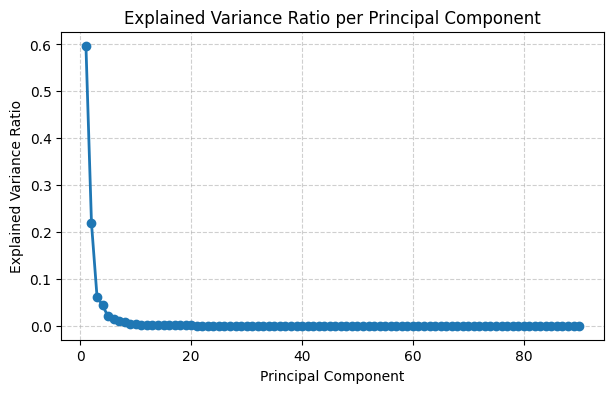

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

X_mag = np.abs(csi)

#subtract mean from each subcarrier
X_centered = X_mag - np.mean(X_mag, axis=0)

# Covariance maxtrix n-subcarriers x n-subcarriers
cov_matrix = np.cov(X_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#sort eigenvalues/vectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# --- 6. Compute explained variance ratio ---
explained_var_ratio = eigenvalues / np.sum(eigenvalues)

# --- 7. Project data onto top-k principal components ---
k = 3
W = eigenvectors[:, :k]         # transformation matrix
X_pca = X_centered @ W          # reduced representation
X_reconstructed = X_pca @ W.T   # denoised approximation

print(eigenvalues / np.sum(eigenvalues))

plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(explained_var_ratio)+1), explained_var_ratio, 'o-', linewidth=2)
plt.title("Explained Variance Ratio per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



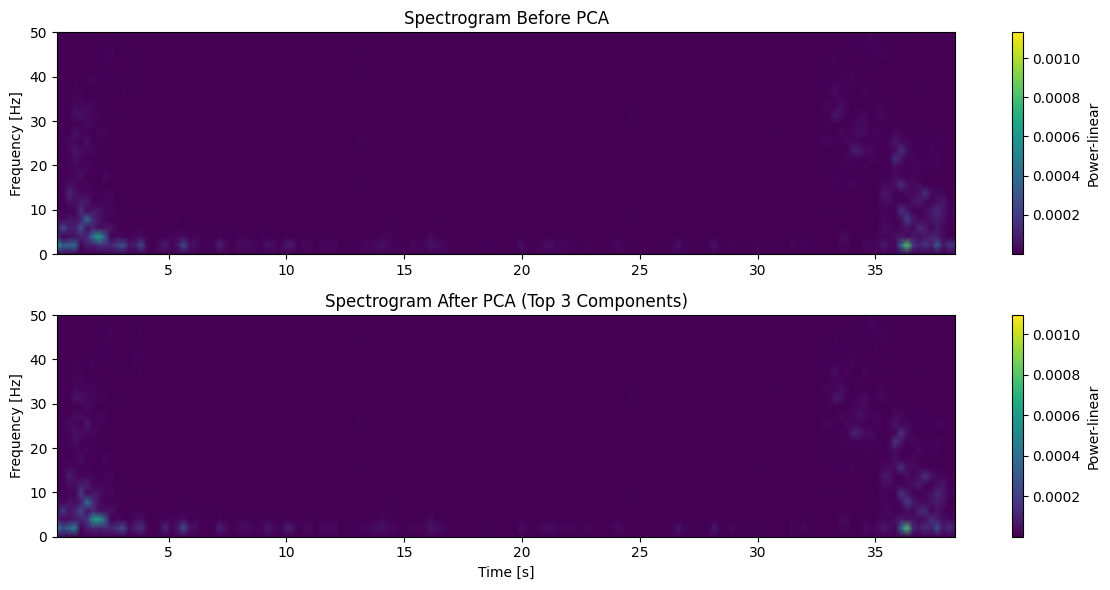

In [ ]:
from scipy.signal import spectrogram

fs = 500 #sampling rate
signal_before = np.mean(X_mag, axis=1)
signal_after  = np.mean(X_reconstructed, axis=1)

f1, t1, Sxx_before = spectrogram(signal_before, fs=fs, nperseg=256, noverlap=128)
f2, t2, Sxx_after  = spectrogram(signal_after, fs=fs, nperseg=256, noverlap=128)


# plot
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.pcolormesh(t1, f1, Sxx_before, shading='gouraud')
plt.title("Spectrogram Before PCA")
plt.ylabel("Frequency [Hz]")
plt.ylim(0, 50)
plt.colorbar(label='Power-linear')

plt.subplot(2,1,2)
plt.pcolormesh(t2, f2, Sxx_after, shading='gouraud')
plt.title("Spectrogram After PCA (Top {} Components)".format(k))
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.ylim(0, 50)
plt.colorbar(label='Power-linear')

plt.tight_layout()
plt.show()



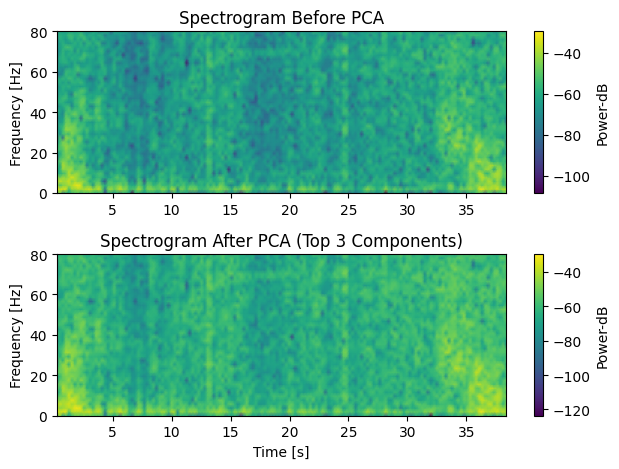

In [ ]:

signal_before = np.mean(X_mag, axis=1)
signal_after  = np.mean(X_reconstructed, axis=1)

vmin = np.percentile(signal_after, 0.001)   # lower bound
vmax = np.percentile(signal_after, 99.99)  # upper bound

plt.subplot(2,1,1)
plt.pcolormesh(t1, f1, 10*np.log10(Sxx_before), shading='gouraud')
plt.title("Spectrogram Before PCA")
plt.ylabel("Frequency [Hz]")
plt.ylim(0, 80)
plt.colorbar(label='Power-dB')

plt.subplot(2,1,2)
plt.pcolormesh(t2, f2, 10*np.log10(Sxx_after), shading='gouraud')
plt.title("Spectrogram After PCA (Top {} Components)".format(k))
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.ylim(0, 80)
plt.colorbar(label='Power-dB')

plt.tight_layout()
plt.show()